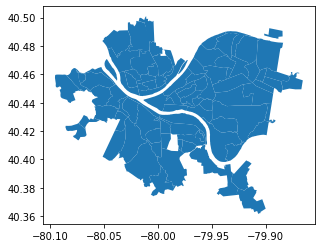

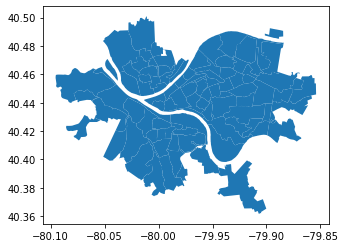

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import math

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

fireZones = geopandas.read_file("FireZones/FireZones.shp")
fireZones = fireZones.to_crs(neighborhoods.crs)
fireZones.plot()

In [18]:
facilities = pd.read_csv("Facilities.csv", usecols = ["name","longitude","latitude","neighborhood","type","fire_zone"])
firehouse = facilities[facilities["type"] == "Firehouse"]
outlierFirehouse = pd.DataFrame({"latitude": [40.441413], "longitude": [-79.921139], "type": ["Firehouse"], "name": ["Firehouse 18 Police 04"], "neighborhood": ["Squirrel Hill North"], "fire_zone":["2-18"]})
firehouse = firehouse.append(outlierFirehouse)
firehouse.iloc[0:]

<ipython-input-18-b9fcb1a4159d>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  firehouse = firehouse.append(outlierFirehouse)


,name,type,neighborhood,fire_zone,latitude,longitude
99,Firehouse 06,Firehouse,Lower Lawrenceville,3-6,40.464894,-79.958144
100,Firehouse 19,Firehouse,Swisshelm Park,2-19,40.420827,-79.899838
101,Firehouse 20 Medic 12,Firehouse,Hays,4-20,40.385781,-79.933013
102,Firehouse 24,Firehouse,South Side Flats,4-24,40.426354,-79.981299
103,Firehouse 31,Firehouse,Sheraden,1-16,40.454572,-80.058537
104,Firehouse 34,Firehouse,Perry North,1-15,40.490070,-80.018169
105,Firehouse 32,Firehouse,East Allegheny,1-5,40.458012,-79.995130
106,Firehouse 26,Firehouse,Brookline,4-26,40.394796,-80.021855
107,Firehouse 23,Firehouse,Carrick,4-12,40.398266,-79.988937
108,Firehouse 33 Truck,Firehouse,Marshall-Shadeland,1-14,40.476648,-80.029693


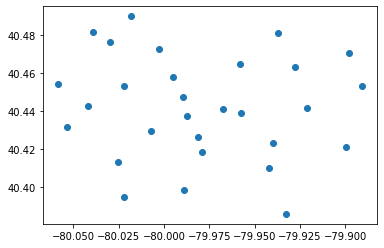

In [3]:
x = firehouse["longitude"]
y = firehouse["latitude"]
plt.scatter(x, y)
plt.show()

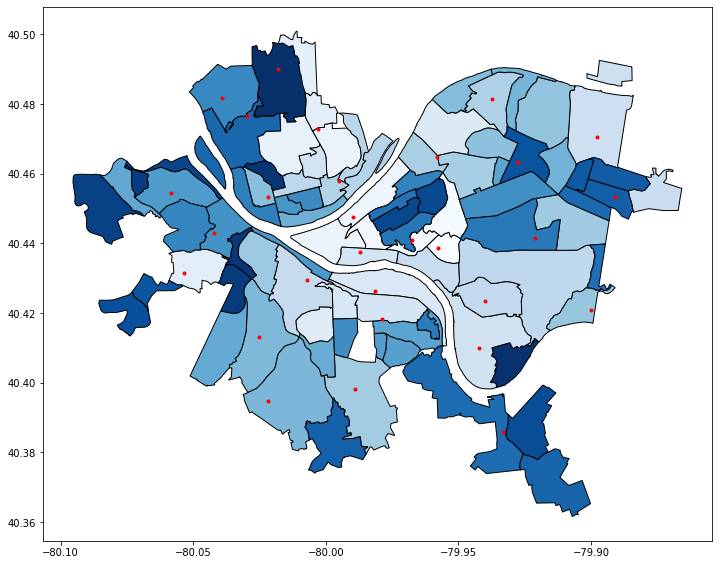

In [10]:
#fig, ax = plt.subplots(1,2, figsize = (20,20))
#neighborhoods.plot(ax = ax[0], color = "blue", edgecolor = "black", cmap="Blues")
#fireZones.plot(ax = ax[1], color = "white", edgecolor = "black", cmap="Oranges")
#plt.scatter(x = firehouse.iloc[0:]["longitude"], y = firehouse.iloc[0:]["latitude"], color = "red", marker = ".", ax=ax[0])
#plt.scatter(x = firehouse.iloc[0:]["longitude"], y = firehouse.iloc[0:]["latitude"], color = "red", marker = ".", ax=ax[1])

fig, ax = plt.subplots(figsize = (12, 12))
neighborhoods.plot(ax = ax, color = "white", edgecolor = "black", cmap="Blues")
plt.scatter(x = firehouse.iloc[0:]["longitude"], y = firehouse.iloc[0:]["latitude"], color = "red", marker = ".")

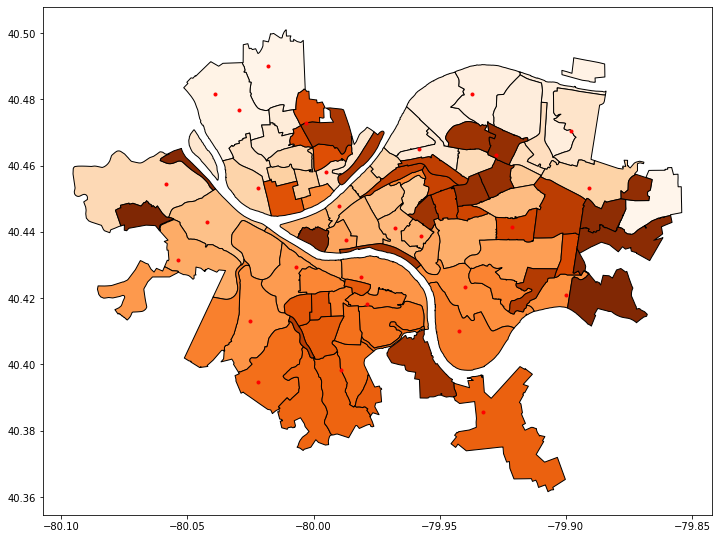

In [13]:
fig, ax = plt.subplots(figsize = (12, 12))
fireZones.plot(ax = ax, color = "white", edgecolor = "black", cmap="Oranges")
plt.scatter(x = firehouse.iloc[0:]["longitude"], y = firehouse.iloc[0:]["latitude"], color = "red", marker = ".")
#for i, firehouseNames in firehouse.iterrows():
#    plt.text(firehouseNames["longitude"], firehouseNames["latitude"], firehouseNames["name"], fontsize = 10)
#plt.show()

In [95]:
#Metric for best neighborhood is narrowed down by how many fire departments are in a fire district, then by proximity to another fire department.
#Worse if fire departments are farther and if the location is in a more remote part of the fire district (Squirrel Hill), better if close fire departments in a district (Oakland)